In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
# load preprocessor

preprocess = joblib.load('data_and_preprocessor_for_ml.joblib')

preprocessor = preprocess['preprocessor']
X = preprocess['X']
X_train = preprocess['X_train']
X_test = preprocess['X_test']
Y = preprocess['Y']
Y_train = preprocess['Y_train']
Y_test = preprocess['Y_test']

c:\Users\david\anaconda3\envs\Data_Boothcamp\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\anaconda3\envs\Data_Boothcamp\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\anaconda3\envs\Data_Boothcamp\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.

# Train Random Forest Classifier

In [3]:
# build random forest model

random_forest_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42))
])

In [4]:
# train random forest model

random_forest_model.fit(X_train, Y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [5]:
# test random forest model

Y_random_forest_predict = random_forest_model.predict(X_test)

# Train Gradient Booster Classifier

In [6]:
# build gradient booster model

gradient_booster_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state = 42))
])

In [7]:
# train gradient booster model

gradient_booster_model.fit(X_train, Y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
# test gradient booster model

Y_gradient_booster_predict = gradient_booster_model.predict(X_test)

# Evaluate the Trained Models

### Evaluation of Random Forest Classifier

In [9]:
# important measurements for random forest model

# how many % of overall predictions were correct:
accuracy = accuracy_score(Y_test, Y_random_forest_predict)

# (reliability of a guess) - if one type is predicted - how likely is it to be the correct prediction:
precision = precision_score(Y_test, Y_random_forest_predict, average='weighted')

# (completeness of a class) 1 - how many Monsters does it miss per type:
recall = recall_score(Y_test, Y_random_forest_predict, average='weighted')

# balancing between precision and recall
f1 = f1_score(Y_test, Y_random_forest_predict, average='weighted')

# report by Type
report = classification_report(Y_test, Y_random_forest_predict)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1 score:", f1)
print("\n")
print("classification report:\n\n", report)

accuracy: 0.9775
precision: 0.9775463365741637
recall: 0.9775
f1 score: 0.9775070048766527


classification report:

               precision    recall  f1-score   support

       ghost       0.98      0.97      0.97       338
    skeleton       0.97      0.97      0.97       317
     vampire       0.96      0.98      0.97       328
    werewolf       0.98      0.99      0.98       364
       witch       0.98      0.97      0.98       320
      zombie       0.99      0.99      0.99       333

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



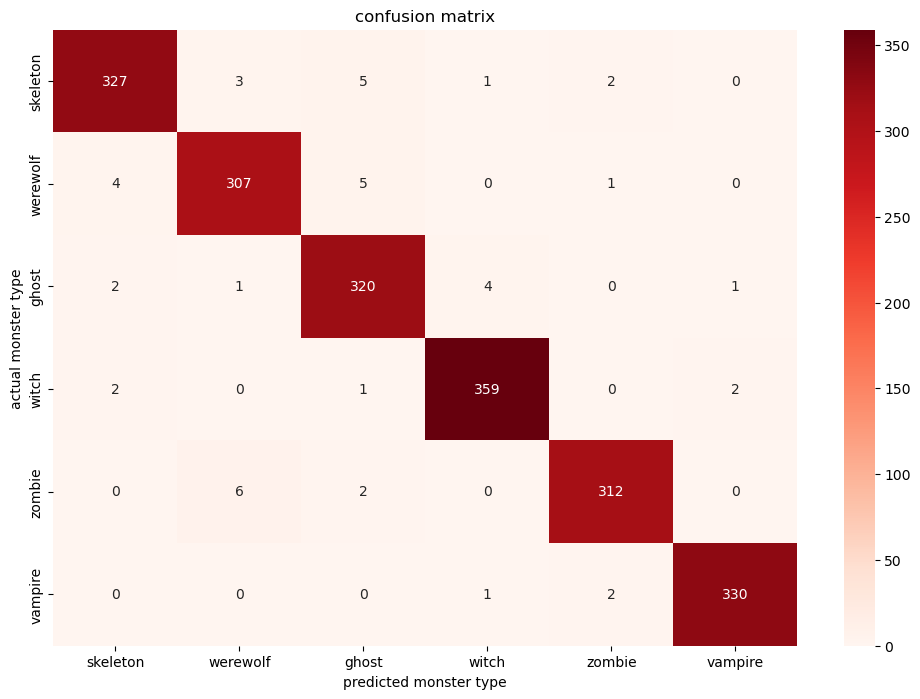

In [10]:
conf_matrix = confusion_matrix(Y_test, Y_random_forest_predict)
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=Y.unique(), yticklabels=Y.unique())
plt.title('confusion matrix')
plt.xlabel('predicted monster type')
plt.ylabel('actual monster type')
plt.show()

In [11]:
# get feature names from all numerical features
numerical_features = X_test.select_dtypes(include=['number']).columns

# get feature names from all not numerical features
categorical_features_names = random_forest_model.named_steps['preprocessor'] \
    .named_transformers_['categorical']['encoder'] \
    .get_feature_names_out(random_forest_model.named_steps['preprocessor'] \
    .transformers_[1][2])

# combine feature names
all_features = list(numerical_features) + list(categorical_features_names)

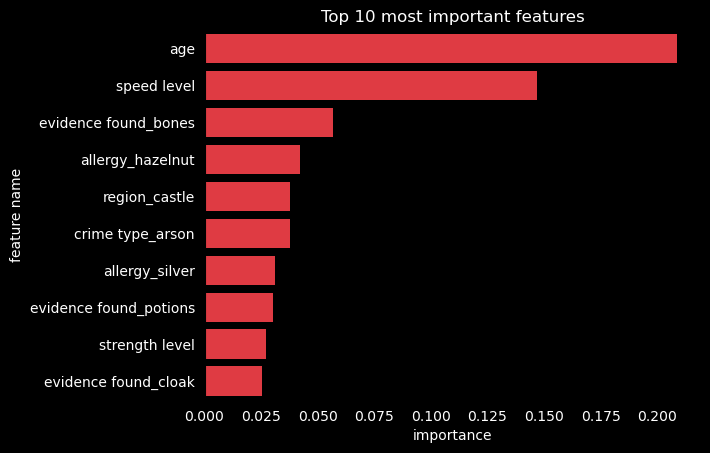

In [17]:
# plot for random forest model
importances = random_forest_model.named_steps['classifier'].feature_importances_
df_importances = pd.DataFrame(importances)
df_importances['features'] = all_features
df_importances.rename(columns={0 : 'importance'}, inplace=True)
df_importances.sort_values(by='importance', inplace=True, ascending=False)
df_importances.head(10).plot(x= 'features', kind='barh').invert_yaxis()

# formatting
plt.gca().set_facecolor("#000000") 
plt.gcf().set_facecolor("#000000") 

bars = plt.barh(y= df_importances['features'], width= df_importances['importance'], color="#df3b43")
plt.xlabel("importance", color="white")
plt.ylabel("feature name", color="white")
plt.xticks(rotation=0, color="white")
plt.yticks(color='white')
plt.title("Top 10 most important features", color="white")
plt.legend().set_visible(False)
plt.show()

### Evaluation of Gradient Booster Classifier

In [13]:
# important measurements for gradient booster model

# how many % of overall predictions were correct:
accuracy = accuracy_score(Y_test, Y_gradient_booster_predict)

# (reliability of a guess) - if one type is predicted - how likely is it to be the correct prediction:
precision = precision_score(Y_test, Y_gradient_booster_predict, average='weighted')

# (completeness of a class) 1 - how many Monsters does it miss per type:
recall = recall_score(Y_test, Y_gradient_booster_predict, average='weighted')

# balancing between precision and recall
f1 = f1_score(Y_test, Y_gradient_booster_predict, average='weighted')

# report by Type
report = classification_report(Y_test, Y_gradient_booster_predict)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1 score:", f1)
print("\n")
print("classification report:\n\n", report)

accuracy: 0.98
precision: 0.9800388739618486
recall: 0.98
f1 score: 0.9799857424729591


classification report:

               precision    recall  f1-score   support

       ghost       0.98      0.97      0.97       338
    skeleton       0.97      0.96      0.97       317
     vampire       0.97      0.99      0.98       328
    werewolf       0.99      0.98      0.98       364
       witch       0.99      0.98      0.99       320
      zombie       0.99      0.99      0.99       333

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



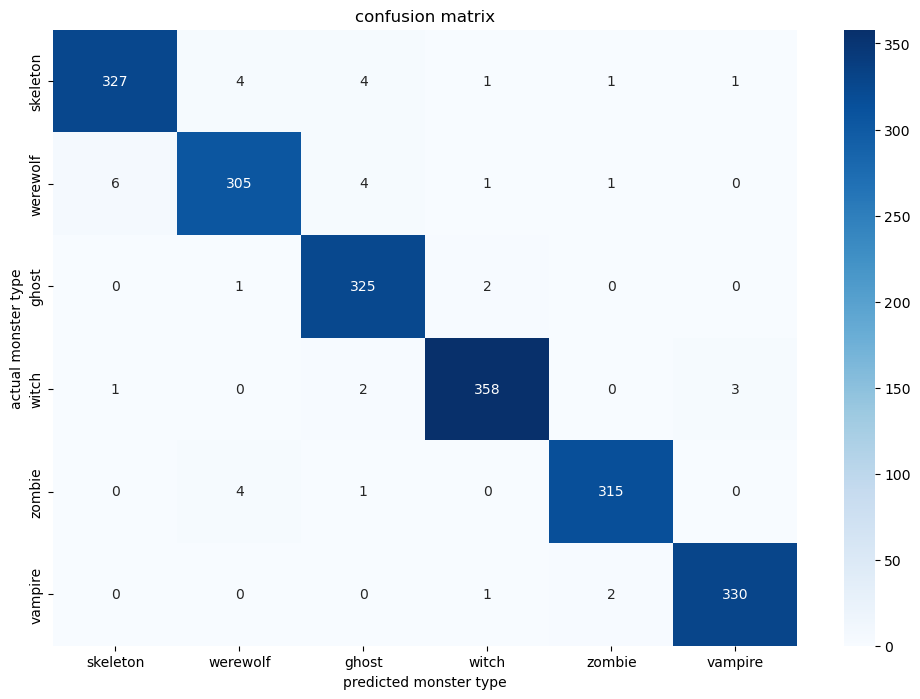

In [14]:
conf_matrix = confusion_matrix(Y_test, Y_gradient_booster_predict)
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=Y.unique(), yticklabels=Y.unique())
plt.title('confusion matrix')
plt.xlabel('predicted monster type')
plt.ylabel('actual monster type')
plt.show()

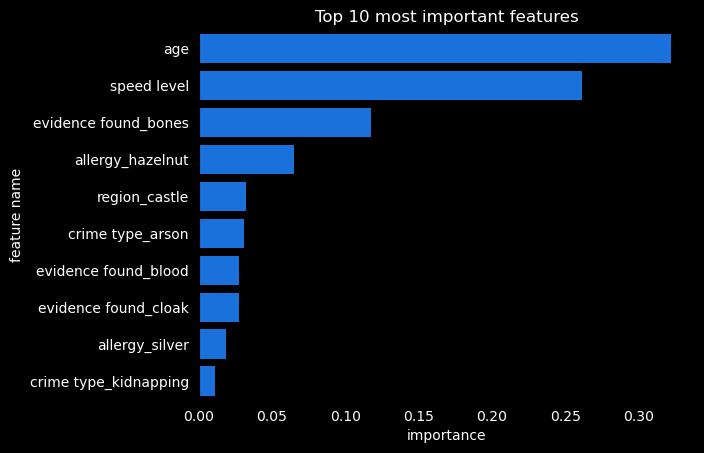

In [18]:
# plot for gradient booster model
importances = gradient_booster_model.named_steps['classifier'].feature_importances_
df_importances = pd.DataFrame(importances)
df_importances['features'] = all_features
df_importances.rename(columns={0 : 'importance'}, inplace=True)
df_importances.sort_values(by='importance', inplace=True, ascending=False)
df_importances.head(10).plot(x= 'features', kind='barh').invert_yaxis()

# formatting
plt.gca().set_facecolor("#000000") 
plt.gcf().set_facecolor('#000000') 

bars = plt.barh(y= df_importances['features'], width= df_importances['importance'], color="#1b71db")
plt.xlabel("importance", color="white")
plt.ylabel("feature name", color="white")
plt.xticks(rotation=0, color="white")
plt.yticks(color='white')
plt.title("Top 10 most important features", color="white")
plt.legend().set_visible(False)
plt.show()

In [16]:
# saving both models

joblib.dump(random_forest_model, 'trained_random_forest_model.pkl')
joblib.dump(gradient_booster_model, 'trained_gradient_booster_model.pkl')

['trained_gradient_booster_model.pkl']